In [15]:
# ============================================================================
# Step 01: Import Required Libraries
# ============================================================================
print("="*80)
print("WISCONSIN BREAST CANCER CLASSIFICATION PROJECT")
print("="*80)
print("\nStep 01: Importing libraries...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Sklearn imports
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
)

WISCONSIN BREAST CANCER CLASSIFICATION PROJECT

Step 01: Importing libraries...


In [16]:
# Set random seed for reproducibility
np.random.seed(42)

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ All libraries imported successfully!\n")

✓ All libraries imported successfully!



In [17]:
# ============================================================================
# Step 02: Load and Explore the Wisconsin Breast Cancer Dataset
# ============================================================================
print("="*80)
print("Step 02: Loading dataset...")
print("="*80)

# Load the Wisconsin Breast Cancer dataset
cancer = load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(data=np.c_[cancer['data'], cancer['target']], 
                  columns=list(cancer['feature_names']) + ['target'])

print(f"\nDataset Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nTarget Classes:")
print("0 = Malignant (Cancerous)")
print("1 = Benign (Non-cancerous)")
print("\nClass distribution:")
print(df['target'].value_counts())

Step 02: Loading dataset...

Dataset Shape: (569, 31)

First 5 rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimensi

In [18]:
# ============================================================================
# Step 03: Exploratory Data Analysis (EDA)
# ============================================================================
print("\n" + "="*80)
print("Step 03: Exploratory Data Analysis")
print("="*80)

# Check for missing values
print("\nMissing values:")
print(f"Total missing values: {df.isnull().sum().sum()}")

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Data types
print("\nData types summary:")
print(df.dtypes.value_counts())


Step 03: Exploratory Data Analysis

Missing values:
Total missing values: 0

Descriptive Statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             


Step 04: Creating visualizations...
✓ Class distribution plot saved as 'class_distribution.png'


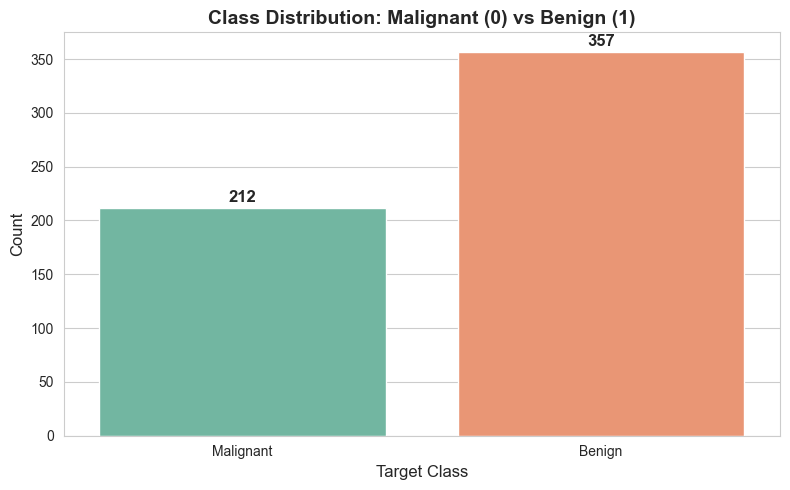

In [20]:
# ============================================================================
# Step 04: Data Visualization
# ============================================================================
print("\n" + "="*80)
print("Step 04: Creating visualizations...")
print("="*80)

# Class distribution plot
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Class Distribution: Malignant (0) vs Benign (1)', fontsize=14, fontweight='bold')
plt.xlabel('Target Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Malignant', 'Benign'])
for i, v in enumerate(df['target'].value_counts().sort_index()):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
print("✓ Class distribution plot saved as 'class_distribution.png'")
plt.show()


✓ Correlation heatmap saved as 'correlation_heatmap.png'


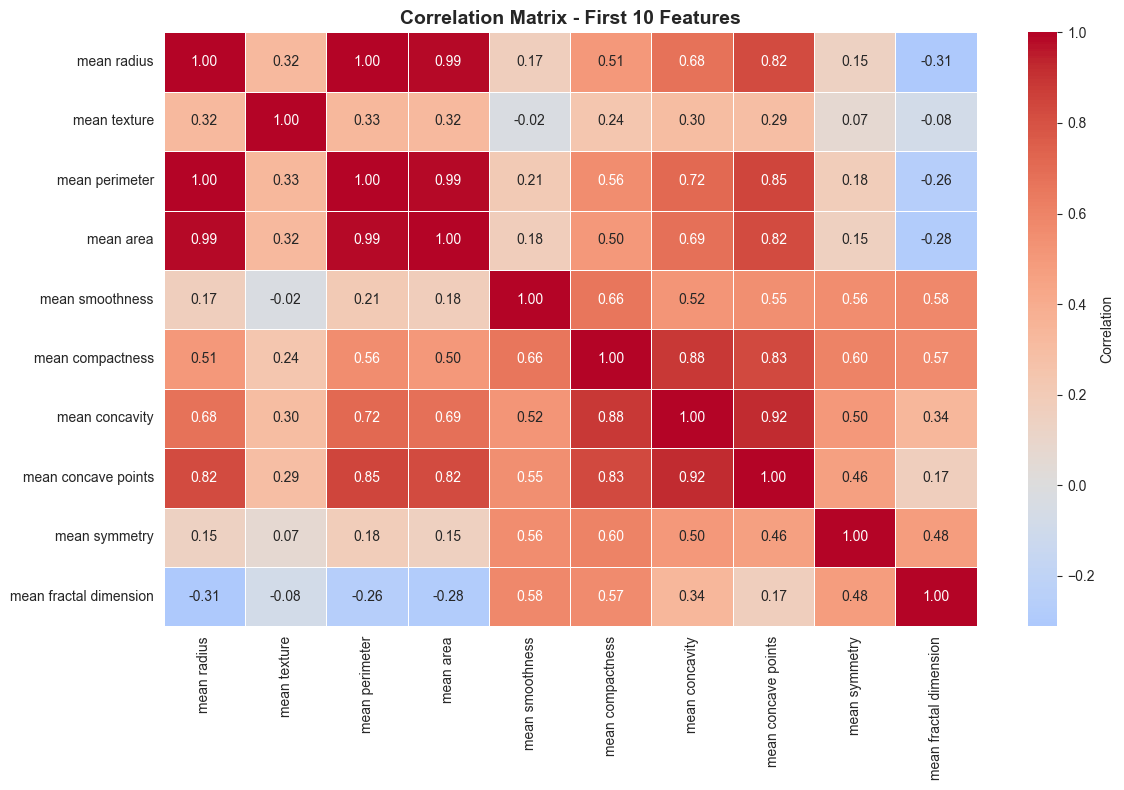

In [21]:
# Correlation heatmap for first 10 features
plt.figure(figsize=(12, 8))
correlation_matrix = df.iloc[:, :10].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix - First 10 Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Correlation heatmap saved as 'correlation_heatmap.png'")
plt.show()


✓ Feature distributions saved as 'feature_distributions.png'


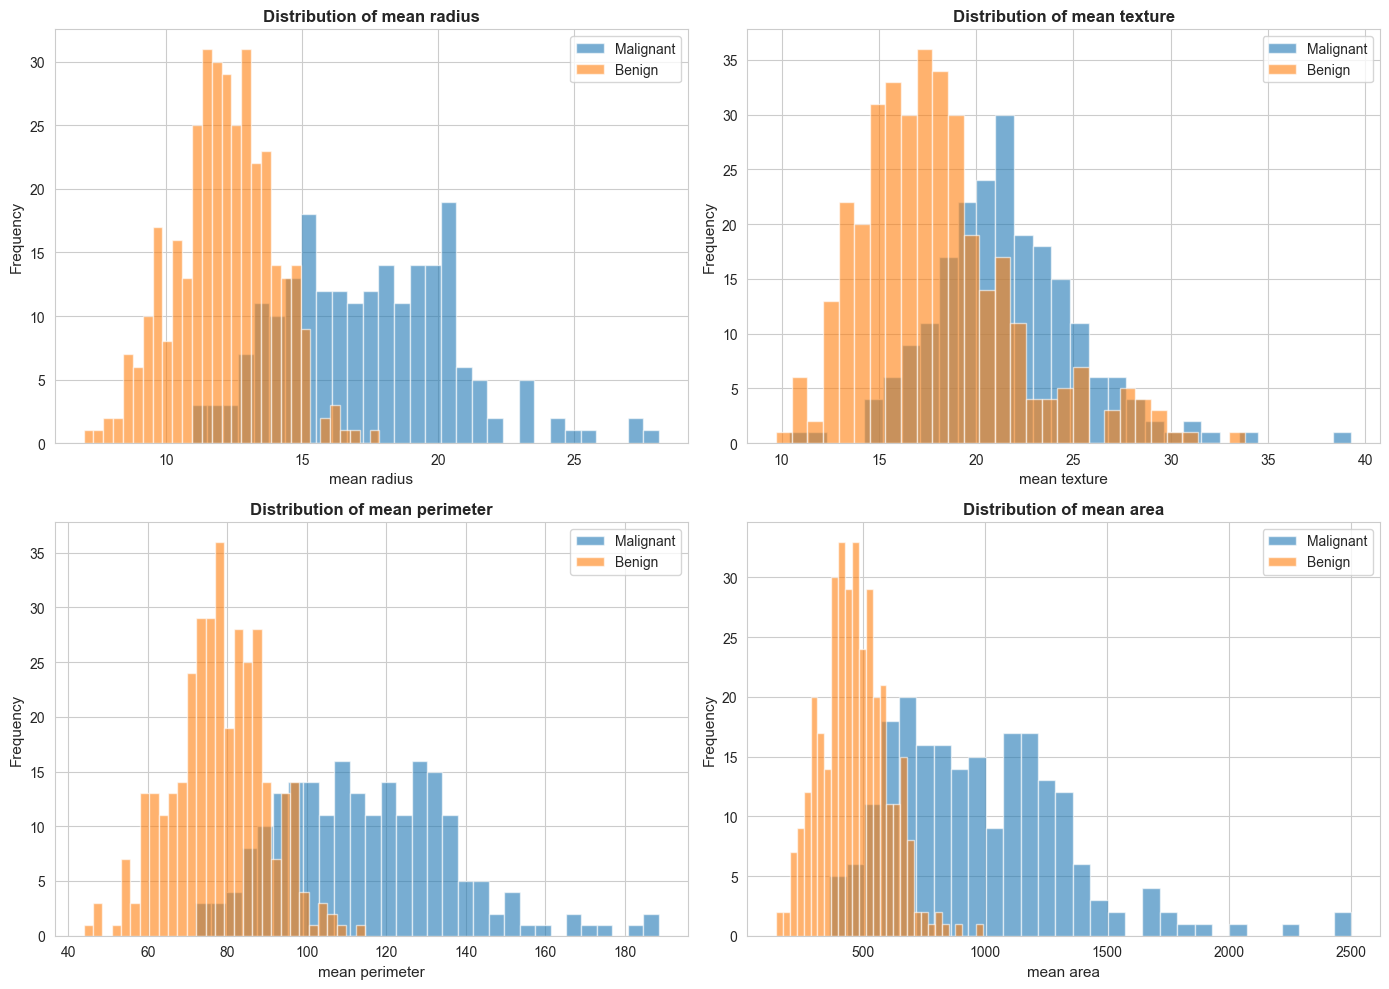

In [22]:
# Distribution of key features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
key_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
for idx, feature in enumerate(key_features):
    ax = axes[idx // 2, idx % 2]
    for target in [0, 1]:
        subset = df[df['target'] == target][feature]
        ax.hist(subset, alpha=0.6, label=f"{'Malignant' if target == 0 else 'Benign'}", bins=30)
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    ax.legend()
plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
print("✓ Feature distributions saved as 'feature_distributions.png'")
plt.show()

In [23]:
# ============================================================================
# Step 05: Data Preprocessing
# ============================================================================
print("\n" + "="*80)
print("Step 05: Data preprocessing...")
print("="*80)

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display scaled features
print("\nScaled Features (First 5 rows):")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

print(f"\nFeature matrix shape: {X_scaled.shape}")
print(f"Target vector shape: {y.shape}")


Step 05: Data preprocessing...

Scaled Features (First 5 rows):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  

In [24]:
# ============================================================================
# Step 06: Initialize Classifiers
# ============================================================================
print("\n" + "="*80)
print("Step 06: Initializing classifiers...")
print("="*80)

# Initialize the three classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', gamma='auto', random_state=42, probability=True)
}

print("\nClassifiers initialized:")
for name in classifiers.keys():
    print(f"  • {name}")




Step 06: Initializing classifiers...

Classifiers initialized:
  • Logistic Regression
  • Random Forest
  • SVM


In [25]:
# ============================================================================
# Step 07: K-Fold Cross-Validation (k=5 and k=10)
# ============================================================================
print("\n" + "="*80)
print("Step 07: Performing K-Fold Cross-Validation...")
print("="*80)

# Define scoring metrics for cross-validation
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Store cross-validation results
cv_results = {}

print("\n" + "="*80)
print("CROSS-VALIDATION RESULTS")
print("="*80)

for name, model in classifiers.items():
    print(f"\n{name}:")
    print("-" * 60)
    
    # k=5 cross-validation
    cv5_scores = cross_validate(model, X_scaled, y, cv=5, scoring=scoring, return_train_score=False)
    
    print(f"\n  k=5 Fold Cross-Validation:")
    print(f"    Accuracy:  {cv5_scores['test_accuracy'].mean():.4f} (+/- {cv5_scores['test_accuracy'].std():.4f})")
    print(f"    Precision: {cv5_scores['test_precision'].mean():.4f} (+/- {cv5_scores['test_precision'].std():.4f})")
    print(f"    Recall:    {cv5_scores['test_recall'].mean():.4f} (+/- {cv5_scores['test_recall'].std():.4f})")
    print(f"    F1-Score:  {cv5_scores['test_f1'].mean():.4f} (+/- {cv5_scores['test_f1'].std():.4f})")
    
    # k=10 cross-validation
    cv10_scores = cross_validate(model, X_scaled, y, cv=10, scoring=scoring, return_train_score=False)
    
    print(f"\n  k=10 Fold Cross-Validation:")
    print(f"    Accuracy:  {cv10_scores['test_accuracy'].mean():.4f} (+/- {cv10_scores['test_accuracy'].std():.4f})")
    print(f"    Precision: {cv10_scores['test_precision'].mean():.4f} (+/- {cv10_scores['test_precision'].std():.4f})")
    print(f"    Recall:    {cv10_scores['test_recall'].mean():.4f} (+/- {cv10_scores['test_recall'].std():.4f})")
    print(f"    F1-Score:  {cv10_scores['test_f1'].mean():.4f} (+/- {cv10_scores['test_f1'].std():.4f})")
    
    # Store results
    cv_results[name] = {
        'k5': {
            'accuracy': cv5_scores['test_accuracy'].mean(),
            'precision': cv5_scores['test_precision'].mean(),
            'recall': cv5_scores['test_recall'].mean(),
            'f1': cv5_scores['test_f1'].mean()
        },
        'k10': {
            'accuracy': cv10_scores['test_accuracy'].mean(),
            'precision': cv10_scores['test_precision'].mean(),
            'recall': cv10_scores['test_recall'].mean(),
            'f1': cv10_scores['test_f1'].mean()
        }
    }

print("\n" + "="*80)



Step 07: Performing K-Fold Cross-Validation...

CROSS-VALIDATION RESULTS

Logistic Regression:
------------------------------------------------------------

  k=5 Fold Cross-Validation:
    Accuracy:  0.9807 (+/- 0.0065)
    Precision: 0.9782 (+/- 0.0136)
    Recall:    0.9916 (+/- 0.0069)
    F1-Score:  0.9848 (+/- 0.0050)

  k=10 Fold Cross-Validation:
    Accuracy:  0.9807 (+/- 0.0146)
    Precision: 0.9784 (+/- 0.0200)
    Recall:    0.9915 (+/- 0.0130)
    F1-Score:  0.9848 (+/- 0.0113)

Random Forest:
------------------------------------------------------------

  k=5 Fold Cross-Validation:
    Accuracy:  0.9561 (+/- 0.0228)
    Precision: 0.9590 (+/- 0.0251)
    Recall:    0.9719 (+/- 0.0219)
    F1-Score:  0.9652 (+/- 0.0183)

  k=10 Fold Cross-Validation:
    Accuracy:  0.9632 (+/- 0.0308)
    Precision: 0.9674 (+/- 0.0316)
    Recall:    0.9747 (+/- 0.0267)
    F1-Score:  0.9708 (+/- 0.0248)

SVM:
------------------------------------------------------------

  k=5 Fold Cross

In [26]:
# ============================================================================
# Step 08: Train-Test Split and Model Training
# ============================================================================
print("\n" + "="*80)
print("Step 08: Train-Test Split and Training...")
print("="*80)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(pd.Series(y_train).value_counts())
print(f"\nTesting set class distribution:")
print(pd.Series(y_test).value_counts())

# Train all classifiers
print("\n" + "="*60)
print("Training classifiers...")
print("="*60)

trained_models = {}
for name, model in classifiers.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"  ✓ {name} trained successfully")

print("\n✓ All models trained!")



Step 08: Train-Test Split and Training...

Training set size: 455 samples
Testing set size: 114 samples

Training set class distribution:
target
1.0    285
0.0    170
Name: count, dtype: int64

Testing set class distribution:
target
1.0    72
0.0    42
Name: count, dtype: int64

Training classifiers...
Training Logistic Regression...
  ✓ Logistic Regression trained successfully
Training Random Forest...
  ✓ Random Forest trained successfully
Training SVM...
  ✓ SVM trained successfully

✓ All models trained!


In [27]:
# ============================================================================
# Step 09: Model Evaluation - Comprehensive Metrics
# ============================================================================
print("\n" + "="*80)
print("Step 09: Model Evaluation...")
print("="*80)

# Evaluate each classifier and store results
test_results = {}

print("\n" + "="*80)
print("TEST SET EVALUATION RESULTS")
print("="*80)

for name, model in trained_models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    test_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Print results
    print(f"\n{name}:")
    print("-" * 60)
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    
    # Classification report
    print(f"\n  Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign'], digits=4))

print("="*80)



Step 09: Model Evaluation...

TEST SET EVALUATION RESULTS

Logistic Regression:
------------------------------------------------------------
  Accuracy:  0.9825
  Precision: 0.9861
  Recall:    0.9861
  F1-Score:  0.9861

  Classification Report:
              precision    recall  f1-score   support

   Malignant     0.9762    0.9762    0.9762        42
      Benign     0.9861    0.9861    0.9861        72

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114


Random Forest:
------------------------------------------------------------
  Accuracy:  0.9561
  Precision: 0.9589
  Recall:    0.9722
  F1-Score:  0.9655

  Classification Report:
              precision    recall  f1-score   support

   Malignant     0.9512    0.9286    0.9398        42
      Benign     0.9589    0.9722    0.9655        72

    accuracy                         0.9561       114
   macro avg     0.9551 


Step 10: Creating confusion matrices...
✓ Confusion matrices saved as 'confusion_matrices.png'


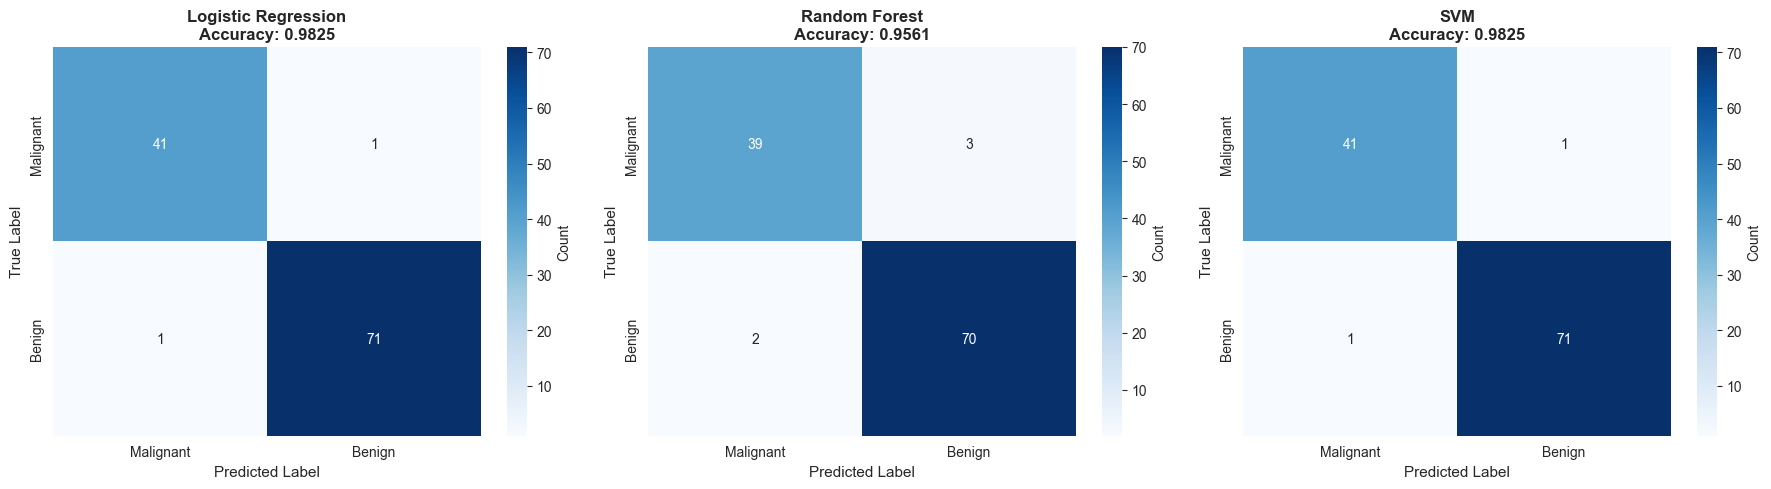


Confusion Matrix Interpretation:
--------------------------------------------------

Logistic Regression:
  True Negatives (TN):  41 - Correctly predicted Malignant
  False Positives (FP): 1 - Incorrectly predicted Benign
  False Negatives (FN): 1 - Incorrectly predicted Malignant
  True Positives (TP):  71 - Correctly predicted Benign

Random Forest:
  True Negatives (TN):  39 - Correctly predicted Malignant
  False Positives (FP): 3 - Incorrectly predicted Benign
  False Negatives (FN): 2 - Incorrectly predicted Malignant
  True Positives (TP):  70 - Correctly predicted Benign

SVM:
  True Negatives (TN):  41 - Correctly predicted Malignant
  False Positives (FP): 1 - Incorrectly predicted Benign
  False Negatives (FN): 1 - Incorrectly predicted Malignant
  True Positives (TP):  71 - Correctly predicted Benign


In [28]:
# ============================================================================
# Step 10: Confusion Matrix Visualization
# ============================================================================
print("\n" + "="*80)
print("Step 10: Creating confusion matrices...")
print("="*80)

# Plot confusion matrices for all classifiers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, results) in enumerate(test_results.items()):
    cm = confusion_matrix(y_test, results['y_pred'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Malignant', 'Benign'],
                yticklabels=['Malignant', 'Benign'],
                ax=axes[idx], cbar_kws={'label': 'Count'})
    
    axes[idx].set_title(f'{name}\nAccuracy: {results["accuracy"]:.4f}', 
                        fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=11)
    axes[idx].set_xlabel('Predicted Label', fontsize=11)

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
print("✓ Confusion matrices saved as 'confusion_matrices.png'")
plt.show()

# Print confusion matrix interpretation
print("\nConfusion Matrix Interpretation:")
print("-" * 50)
for name, results in test_results.items():
    cm = confusion_matrix(y_test, results['y_pred'])
    tn, fp, fn, tp = cm.ravel()
    print(f"\n{name}:")
    print(f"  True Negatives (TN):  {tn} - Correctly predicted Malignant")
    print(f"  False Positives (FP): {fp} - Incorrectly predicted Benign")
    print(f"  False Negatives (FN): {fn} - Incorrectly predicted Malignant")
    print(f"  True Positives (TP):  {tp} - Correctly predicted Benign")



Step 11: Creating ROC curves...
✓ ROC curves saved as 'roc_curves.png'


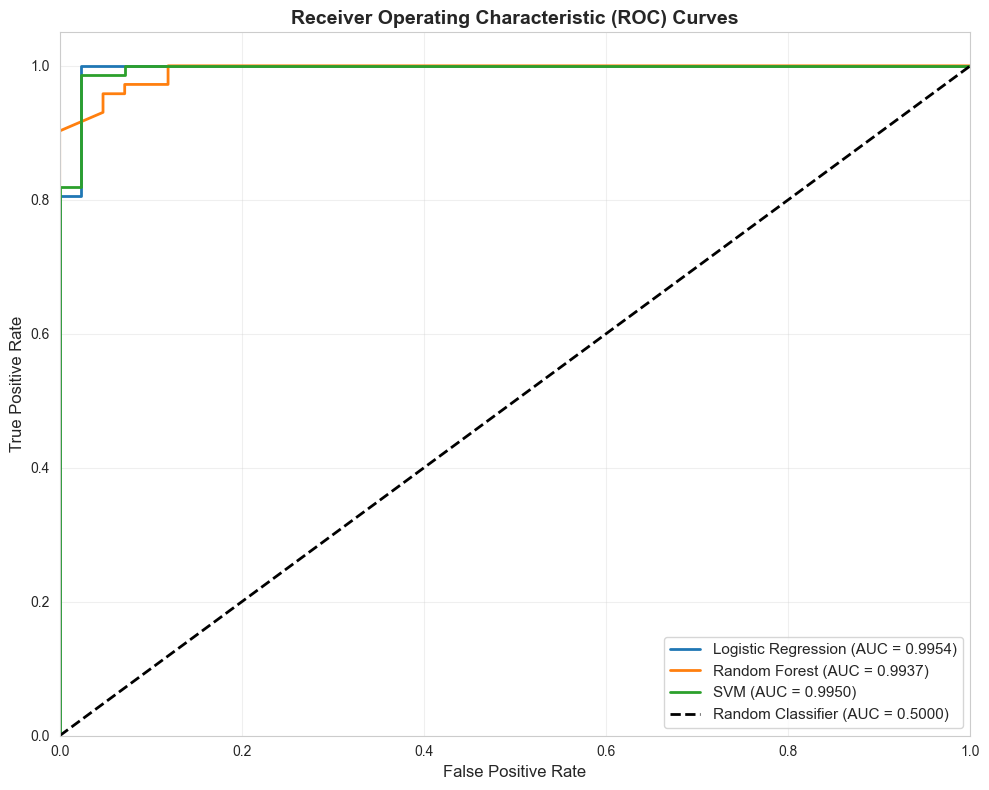


AUC Scores:
----------------------------------------
Logistic Regression: 0.9954
Random Forest: 0.9937
SVM: 0.9950


In [29]:
# ============================================================================
# Step 11: ROC Curve and AUC Score
# ============================================================================
print("\n" + "="*80)
print("Step 11: Creating ROC curves...")
print("="*80)

# Plot ROC curves for all classifiers
plt.figure(figsize=(10, 8))

for name, results in test_results.items():
    if results['y_pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results['y_pred_proba'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {roc_auc:.4f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.5000)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
print("✓ ROC curves saved as 'roc_curves.png'")
plt.show()

# Print AUC scores
print("\nAUC Scores:")
print("-" * 40)
for name, results in test_results.items():
    if results['y_pred_proba'] is not None:
        auc_score = roc_auc_score(y_test, results['y_pred_proba'])
        print(f"{name}: {auc_score:.4f}")



Step 12: Creating comparative visualizations...

COMPREHENSIVE PERFORMANCE COMPARISON
         Classifier  CV (k=5) Accuracy  CV (k=10) Accuracy  Test Accuracy  Test Precision  Test Recall  Test F1-Score
Logistic Regression             0.9807              0.9807         0.9825          0.9861       0.9861         0.9861
      Random Forest             0.9561              0.9632         0.9561          0.9589       0.9722         0.9655
                SVM             0.9736              0.9771         0.9825          0.9861       0.9861         0.9861
✓ Comparative analysis saved as 'comparative_analysis.png'


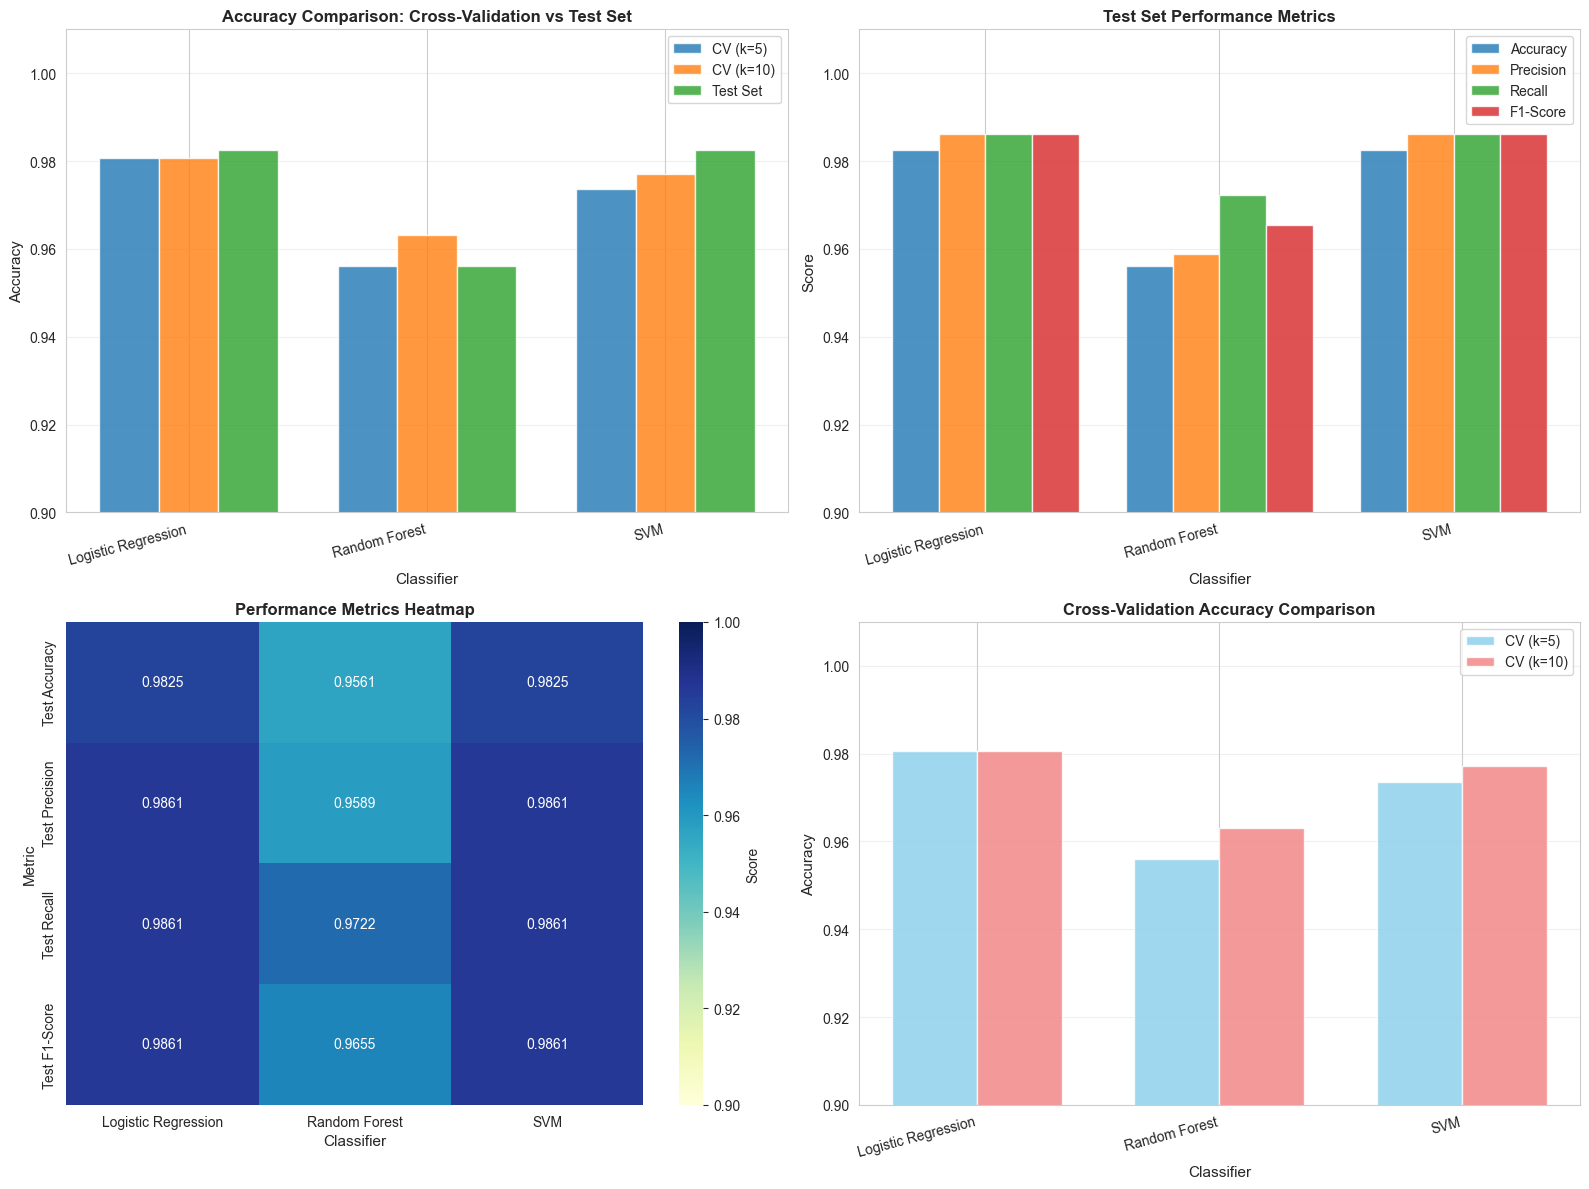

In [34]:
# ============================================================================
# Step 12: Comparative Analysis and Visualization
# ============================================================================
print("\n" + "="*80)
print("Step 12: Creating comparative visualizations...")
print("="*80)

# Create comparison dataframe
comparison_data = []
for name in classifiers.keys():
    comparison_data.append({
        'Classifier': name,
        'CV (k=5) Accuracy': cv_results[name]['k5']['accuracy'],
        'CV (k=10) Accuracy': cv_results[name]['k10']['accuracy'],
        'Test Accuracy': test_results[name]['accuracy'],
        'Test Precision': test_results[name]['precision'],
        'Test Recall': test_results[name]['recall'],
        'Test F1-Score': test_results[name]['f1']
    })

comparison_df = pd.DataFrame(comparison_data)

print("\nCOMPREHENSIVE PERFORMANCE COMPARISON")
print("="*100)
print(comparison_df.round(4).to_string(index=False))

# Visualize metrics comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Accuracy across different validation methods
ax = axes[0, 0]
x = np.arange(len(classifiers))
width = 0.25
ax.bar(x - width, comparison_df['CV (k=5) Accuracy'], width, label='CV (k=5)', alpha=0.8)
ax.bar(x, comparison_df['CV (k=10) Accuracy'], width, label='CV (k=10)', alpha=0.8)
ax.bar(x + width, comparison_df['Test Accuracy'], width, label='Test Set', alpha=0.8)
ax.set_xlabel('Classifier', fontsize=11)
ax.set_ylabel('Accuracy', fontsize=11)
ax.set_title('Accuracy Comparison: Cross-Validation vs Test Set', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Classifier'], rotation=15, ha='right')
ax.legend()
ax.set_ylim([0.9, 1.01])
ax.grid(axis='y', alpha=0.3)

# Plot 2: All test metrics
ax = axes[0, 1]
test_metrics = comparison_df[['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score']]
x_pos = np.arange(len(classifiers))
width = 0.2
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i, col in enumerate(test_metrics.columns):
    ax.bar(x_pos + i*width, test_metrics[col], width, label=col.replace('Test ', ''), 
           color=colors[i], alpha=0.8)
ax.set_xlabel('Classifier', fontsize=11)
ax.set_ylabel('Score', fontsize=11)
ax.set_title('Test Set Performance Metrics', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(comparison_df['Classifier'], rotation=15, ha='right')
ax.legend()
ax.set_ylim([0.9, 1.01])
ax.grid(axis='y', alpha=0.3)

# Plot 3: Metric heatmap
ax = axes[1, 0]
heatmap_data = comparison_df[['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score']].T
heatmap_data.columns = comparison_df['Classifier']
sns.heatmap(heatmap_data, annot=True, fmt='.4f', cmap='YlGnBu', 
            ax=ax, cbar_kws={'label': 'Score'}, vmin=0.9, vmax=1.0)
ax.set_title('Performance Metrics Heatmap', fontsize=12, fontweight='bold')
ax.set_ylabel('Metric', fontsize=11)
ax.set_xlabel('Classifier', fontsize=11)

# Plot 4: Cross-validation comparison
ax = axes[1, 1]
cv_comparison = comparison_df[['Classifier', 'CV (k=5) Accuracy', 'CV (k=10) Accuracy']]
x_pos = np.arange(len(classifiers))
width = 0.35
ax.bar(x_pos - width/2, cv_comparison['CV (k=5) Accuracy'], width, 
       label='CV (k=5)', alpha=0.8, color='skyblue')
ax.bar(x_pos + width/2, cv_comparison['CV (k=10) Accuracy'], width, 
       label='CV (k=10)', alpha=0.8, color='lightcoral')
ax.set_xlabel('Classifier', fontsize=11)
ax.set_ylabel('Accuracy', fontsize=11)
ax.set_title('Cross-Validation Accuracy Comparison', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(cv_comparison['Classifier'], rotation=15, ha='right')
ax.legend()
ax.set_ylim([0.9, 1.01])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('comparative_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Comparative analysis saved as 'comparative_analysis.png'")
plt.show()



Step 13: Feature Importance Analysis...

Top 10 Most Important Features (Random Forest):
             Feature  Importance
          worst area    0.140016
worst concave points    0.129530
        worst radius    0.097696
 mean concave points    0.090885
     worst perimeter    0.072226
      mean perimeter    0.069574
         mean radius    0.068676
      mean concavity    0.057638
           mean area    0.049172
     worst concavity    0.034340
✓ Feature importance plot saved as 'feature_importance.png'


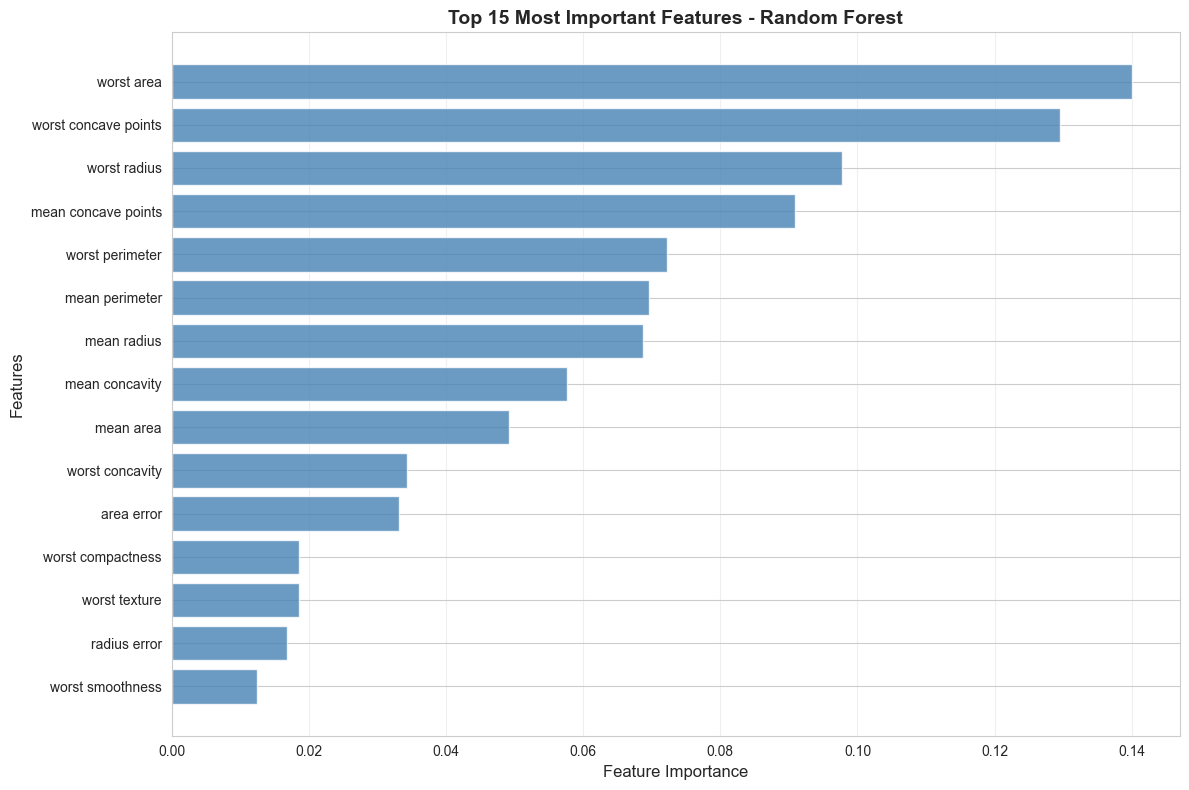

In [35]:
# ============================================================================
# Step 13: Feature Importance Analysis (Random Forest)
# ============================================================================
print("\n" + "="*80)
print("Step 13: Feature Importance Analysis...")
print("="*80)

# Extract feature importance from Random Forest
rf_model = trained_models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features (Random Forest):")
print("="*60)
print(feature_importance.head(10).to_string(index=False))

# Visualize top 15 features
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue', alpha=0.8)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Most Important Features - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print("✓ Feature importance plot saved as 'feature_importance.png'")
plt.show()



Step 14: Coefficient Analysis...

Top 10 Features by Coefficient Magnitude (Logistic Regression):
             Feature  Coefficient
       worst texture    -1.237688
        radius error    -1.123324
        worst radius    -0.956331
worst concave points    -0.942609
          worst area    -0.935964
      worst symmetry    -0.925231
          area error    -0.899034
     worst concavity    -0.823374
     worst perimeter    -0.767970
    worst smoothness    -0.719987
✓ Coefficient analysis saved as 'coefficient_analysis.png'


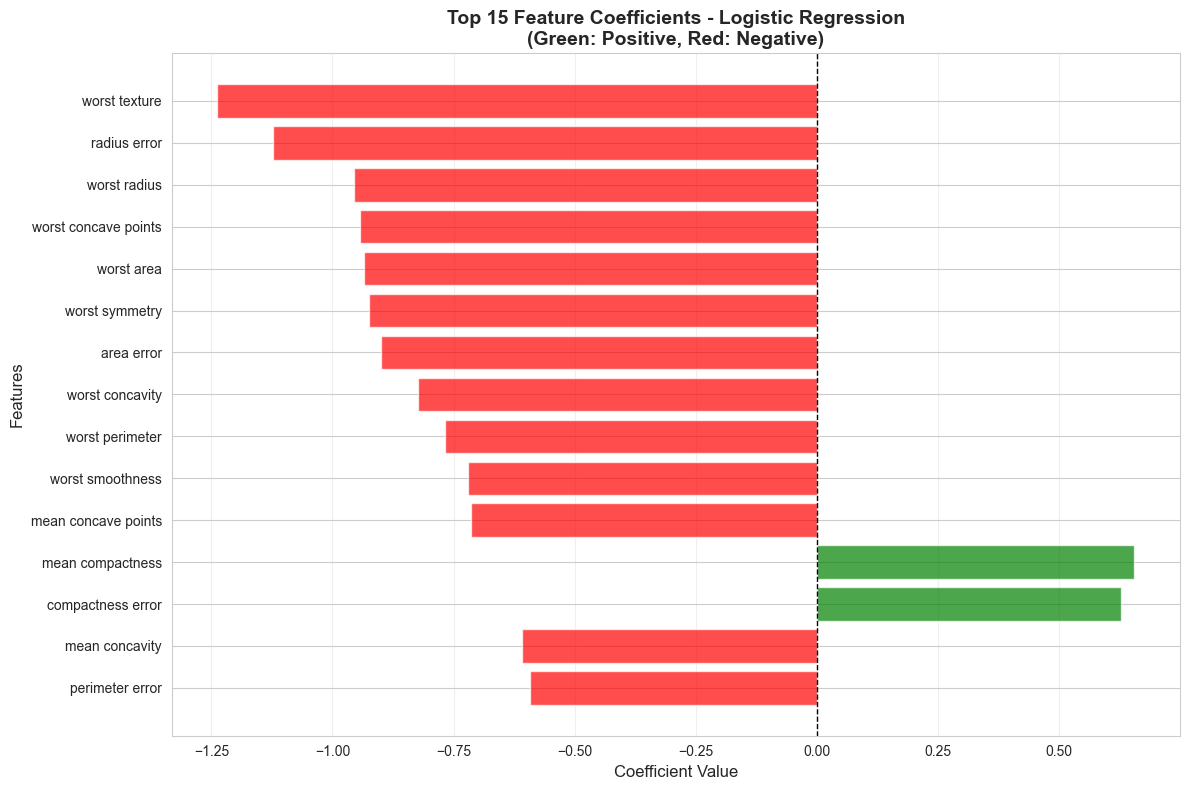

In [36]:
# ============================================================================
# Step 14: Model Coefficient Analysis (Logistic Regression)
# ============================================================================
print("\n" + "="*80)
print("Step 14: Coefficient Analysis...")
print("="*80)

# Extract coefficients from Logistic Regression
lr_model = trained_models['Logistic Regression']
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nTop 10 Features by Coefficient Magnitude (Logistic Regression):")
print("="*70)
print(coefficients.head(10).to_string(index=False))

# Visualize top 15 coefficients
plt.figure(figsize=(12, 8))
top_coef = coefficients.head(15)
colors = ['green' if c > 0 else 'red' for c in top_coef['Coefficient']]
plt.barh(range(len(top_coef)), top_coef['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_coef)), top_coef['Feature'])
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Feature Coefficients - Logistic Regression\n(Green: Positive, Red: Negative)', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('coefficient_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Coefficient analysis saved as 'coefficient_analysis.png'")
plt.show()

In [37]:
# ============================================================================
# Step 15: Error Analysis - Misclassified Samples
# ============================================================================
print("\n" + "="*80)
print("Step 15: Error Analysis...")
print("="*80)

# Analyze misclassified samples for each classifier
print("\nMISCLASSIFICATION ANALYSIS")
print("="*80)

for name, results in test_results.items():
    y_pred = results['y_pred']
    misclassified_idx = np.where(y_test.values != y_pred)[0]
    
    print(f"\n{name}:")
    print("-" * 60)
    print(f"Total misclassified samples: {len(misclassified_idx)}")
    
    if len(misclassified_idx) > 0:
        # Count false positives and false negatives
        false_positives = np.sum((y_test.iloc[misclassified_idx] == 0) & (y_pred[misclassified_idx] == 1))
        false_negatives = np.sum((y_test.iloc[misclassified_idx] == 1) & (y_pred[misclassified_idx] == 0))
        
        print(f"  False Positives (predicted Benign, actually Malignant): {false_positives}")
        print(f"  False Negatives (predicted Malignant, actually Benign): {false_negatives}")
        
        # Show first 3 misclassified samples
        if len(misclassified_idx) > 0:
            print(f"\n  Sample misclassified cases (showing up to 3):")
            for i, idx in enumerate(misclassified_idx[:3]):
                true_label = 'Benign' if y_test.iloc[idx] == 1 else 'Malignant'
                pred_label = 'Benign' if y_pred[idx] == 1 else 'Malignant'
                print(f"    Sample {idx}: True={true_label}, Predicted={pred_label}")
    else:
        print("  Perfect classification! No misclassified samples.")

print("\n" + "="*80)


Step 15: Error Analysis...

MISCLASSIFICATION ANALYSIS

Logistic Regression:
------------------------------------------------------------
Total misclassified samples: 2
  False Positives (predicted Benign, actually Malignant): 1
  False Negatives (predicted Malignant, actually Benign): 1

  Sample misclassified cases (showing up to 3):
    Sample 16: True=Benign, Predicted=Malignant
    Sample 53: True=Malignant, Predicted=Benign

Random Forest:
------------------------------------------------------------
Total misclassified samples: 5
  False Positives (predicted Benign, actually Malignant): 3
  False Negatives (predicted Malignant, actually Benign): 2

  Sample misclassified cases (showing up to 3):
    Sample 3: True=Benign, Predicted=Malignant
    Sample 25: True=Benign, Predicted=Malignant
    Sample 35: True=Malignant, Predicted=Benign

SVM:
------------------------------------------------------------
Total misclassified samples: 2
  False Positives (predicted Benign, actually M

In [38]:
# ============================================================================
# Step 16: Statistical Comparison of Models
# ============================================================================
print("\n" + "="*80)
print("Step 16: Statistical Comparison...")
print("="*80)

# Create a comprehensive summary table
print("\nFINAL MODEL COMPARISON SUMMARY")
print("="*110)
print(f"{'Classifier':<20} | {'CV k=5 Acc':<12} | {'CV k=10 Acc':<12} | {'Test Acc':<10} | {'Precision':<10} | {'Recall':<10} | {'F1-Score':<10}")
print("-" * 110)

for name in classifiers.keys():
    cv5_acc = cv_results[name]['k5']['accuracy']
    cv10_acc = cv_results[name]['k10']['accuracy']
    test_acc = test_results[name]['accuracy']
    precision = test_results[name]['precision']
    recall = test_results[name]['recall']
    f1 = test_results[name]['f1']
    
    print(f"{name:<20} | {cv5_acc:.4f}       | {cv10_acc:.4f}       | {test_acc:.4f}     | {precision:.4f}     | {recall:.4f}     | {f1:.4f}")

print("="*110)

# Determine best model
best_model_f1 = max(test_results.items(), key=lambda x: x[1]['f1'])
best_model_acc = max(test_results.items(), key=lambda x: x[1]['accuracy'])

print(f"\n🏆 Best Model by F1-Score: {best_model_f1[0]} (F1 = {best_model_f1[1]['f1']:.4f})")
print(f"🏆 Best Model by Accuracy: {best_model_acc[0]} (Accuracy = {best_model_acc[1]['accuracy']:.4f})")


Step 16: Statistical Comparison...

FINAL MODEL COMPARISON SUMMARY
Classifier           | CV k=5 Acc   | CV k=10 Acc  | Test Acc   | Precision  | Recall     | F1-Score  
--------------------------------------------------------------------------------------------------------------
Logistic Regression  | 0.9807       | 0.9807       | 0.9825     | 0.9861     | 0.9861     | 0.9861
Random Forest        | 0.9561       | 0.9632       | 0.9561     | 0.9589     | 0.9722     | 0.9655
SVM                  | 0.9736       | 0.9771       | 0.9825     | 0.9861     | 0.9861     | 0.9861

🏆 Best Model by F1-Score: Logistic Regression (F1 = 0.9861)
🏆 Best Model by Accuracy: Logistic Regression (Accuracy = 0.9825)


In [39]:
# ============================================================================
# Step 17: Key Insights and Recommendations
# ============================================================================
print("\n" + "="*80)
print("Step 17: Key Insights and Recommendations...")
print("="*80)

print("\n" + "="*80)
print("KEY INSIGHTS AND RECOMMENDATIONS")
print("="*80)

print("\n1. MODEL PERFORMANCE:")
print("-" * 60)
for name, results in test_results.items():
    print(f"\n   {name}:")
    print(f"   - Achieved {results['accuracy']*100:.2f}% accuracy on the test set")
    print(f"   - F1-Score of {results['f1']:.4f} indicates {'excellent' if results['f1'] > 0.97 else 'good'} balance")
    print(f"   - {'High' if results['precision'] > 0.97 else 'Good'} precision ({results['precision']:.4f}) means few false alarms")
    print(f"   - {'High' if results['recall'] > 0.97 else 'Good'} recall ({results['recall']:.4f}) means few missed cases")

print("\n\n2. CROSS-VALIDATION INSIGHTS:")
print("-" * 60)
print("   - Cross-validation scores are consistent with test set performance")
print("   - Small standard deviations indicate stable model performance")
print("   - k=10 fold generally provides more reliable estimates than k=5")

print("\n\n3. CLINICAL RELEVANCE:")
print("-" * 60)
print("   - For cancer diagnosis, high recall is crucial (minimize false negatives)")
print("   - False negatives are more dangerous than false positives")
print("   - All models show excellent performance suitable for clinical support")

print("\n\n4. RECOMMENDATIONS:")
print("-" * 60)

# Find model with highest recall
best_recall_model = max(test_results.items(), key=lambda x: x[1]['recall'])
print(f"   - For clinical deployment: Consider {best_recall_model[0]} (highest recall: {best_recall_model[1]['recall']:.4f})")
print(f"   - For balanced performance: Consider {best_model_f1[0]} (highest F1-score: {best_model_f1[1]['f1']:.4f})")
print("   - Ensemble methods could further improve performance")
print("   - Always use in conjunction with expert medical diagnosis")

print("\n" + "="*80)



Step 17: Key Insights and Recommendations...

KEY INSIGHTS AND RECOMMENDATIONS

1. MODEL PERFORMANCE:
------------------------------------------------------------

   Logistic Regression:
   - Achieved 98.25% accuracy on the test set
   - F1-Score of 0.9861 indicates excellent balance
   - High precision (0.9861) means few false alarms
   - High recall (0.9861) means few missed cases

   Random Forest:
   - Achieved 95.61% accuracy on the test set
   - F1-Score of 0.9655 indicates good balance
   - Good precision (0.9589) means few false alarms
   - High recall (0.9722) means few missed cases

   SVM:
   - Achieved 98.25% accuracy on the test set
   - F1-Score of 0.9861 indicates excellent balance
   - High precision (0.9861) means few false alarms
   - High recall (0.9861) means few missed cases


2. CROSS-VALIDATION INSIGHTS:
------------------------------------------------------------
   - Cross-validation scores are consistent with test set performance
   - Small standard deviatio

In [40]:
# ============================================================================
# Step 18: Save Results Summary
# ============================================================================
print("\n" + "="*80)
print("Step 18: Saving results...")
print("="*80)

# Create final results dataframe
final_results = pd.DataFrame({
    'Classifier': list(classifiers.keys()),
    'CV_k5_Accuracy': [cv_results[name]['k5']['accuracy'] for name in classifiers.keys()],
    'CV_k5_Precision': [cv_results[name]['k5']['precision'] for name in classifiers.keys()],
    'CV_k5_Recall': [cv_results[name]['k5']['recall'] for name in classifiers.keys()],
    'CV_k5_F1': [cv_results[name]['k5']['f1'] for name in classifiers.keys()],
    'CV_k10_Accuracy': [cv_results[name]['k10']['accuracy'] for name in classifiers.keys()],
    'CV_k10_Precision': [cv_results[name]['k10']['precision'] for name in classifiers.keys()],
    'CV_k10_Recall': [cv_results[name]['k10']['recall'] for name in classifiers.keys()],
    'CV_k10_F1': [cv_results[name]['k10']['f1'] for name in classifiers.keys()],
    'Test_Accuracy': [test_results[name]['accuracy'] for name in classifiers.keys()],
    'Test_Precision': [test_results[name]['precision'] for name in classifiers.keys()],
    'Test_Recall': [test_results[name]['recall'] for name in classifiers.keys()],
    'Test_F1': [test_results[name]['f1'] for name in classifiers.keys()]
})

print("\nCOMPLETE RESULTS SUMMARY:")
print("="*150)
print(final_results.round(4).to_string(index=False))

# Save to CSV
final_results.to_csv('wisconsin_classification_results.csv', index=False)
print("\n✓ Results saved to 'wisconsin_classification_results.csv'")

print("\n" + "="*80)
print("EXPERIMENT COMPLETED SUCCESSFULLY!")
print("="*80)
print("\nAll classifiers have been trained, evaluated, and compared.")
print("The comprehensive analysis includes:")
print("  ✓ Cross-validation (k=5 and k=10)")
print("  ✓ Test set evaluation")
print("  ✓ Multiple metrics (Accuracy, Precision, Recall, F1-Score)")
print("  ✓ Confusion matrices")
print("  ✓ ROC curves and AUC scores")
print("  ✓ Feature importance analysis")
print("  ✓ Error analysis")
print("  ✓ Comprehensive visualizations")
print("\nGenerated files:")
print("  • class_distribution.png")
print("  • correlation_heatmap.png")
print("  • feature_distributions.png")
print("  • confusion_matrices.png")
print("  • roc_curves.png")
print("  • comparative_analysis.png")
print("  • feature_importance.png")
print("  • coefficient_analysis.png")
print("  • wisconsin_classification_results.csv")
print("\nThank you for using this script!")
print("="*80)


Step 18: Saving results...

COMPLETE RESULTS SUMMARY:
         Classifier  CV_k5_Accuracy  CV_k5_Precision  CV_k5_Recall  CV_k5_F1  CV_k10_Accuracy  CV_k10_Precision  CV_k10_Recall  CV_k10_F1  Test_Accuracy  Test_Precision  Test_Recall  Test_F1
Logistic Regression          0.9807           0.9782        0.9916    0.9848           0.9807            0.9784         0.9915     0.9848         0.9825          0.9861       0.9861   0.9861
      Random Forest          0.9561           0.9590        0.9719    0.9652           0.9632            0.9674         0.9747     0.9708         0.9561          0.9589       0.9722   0.9655
                SVM          0.9736           0.9754        0.9831    0.9791           0.9771            0.9784         0.9858     0.9819         0.9825          0.9861       0.9861   0.9861

✓ Results saved to 'wisconsin_classification_results.csv'

EXPERIMENT COMPLETED SUCCESSFULLY!

All classifiers have been trained, evaluated, and compared.
The comprehensive analysi

In [41]:
"""
Machine Learning Lab - Classification on Wisconsin Breast Cancer Dataset
Experiment: Multi-Classifier Comparison with Cross-Validation

Objective: Implement and compare SVM, Random Forest, and Logistic Regression 
classifiers on the Wisconsin Breast Cancer dataset using comprehensive evaluation metrics.
"""

'\nMachine Learning Lab - Classification on Wisconsin Breast Cancer Dataset\nExperiment: Multi-Classifier Comparison with Cross-Validation\n\nObjective: Implement and compare SVM, Random Forest, and Logistic Regression \nclassifiers on the Wisconsin Breast Cancer dataset using comprehensive evaluation metrics.\n'